In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing necessary libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
data = pd.read_csv("C:\\PythonProjects\\my_actual_project\\note_books\\Algerian_forest_fires_cleaned_dataset.csv")

# loadin the Algerian fire data

In [11]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


# EDA 

In [12]:
import numpy as np

df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [14]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

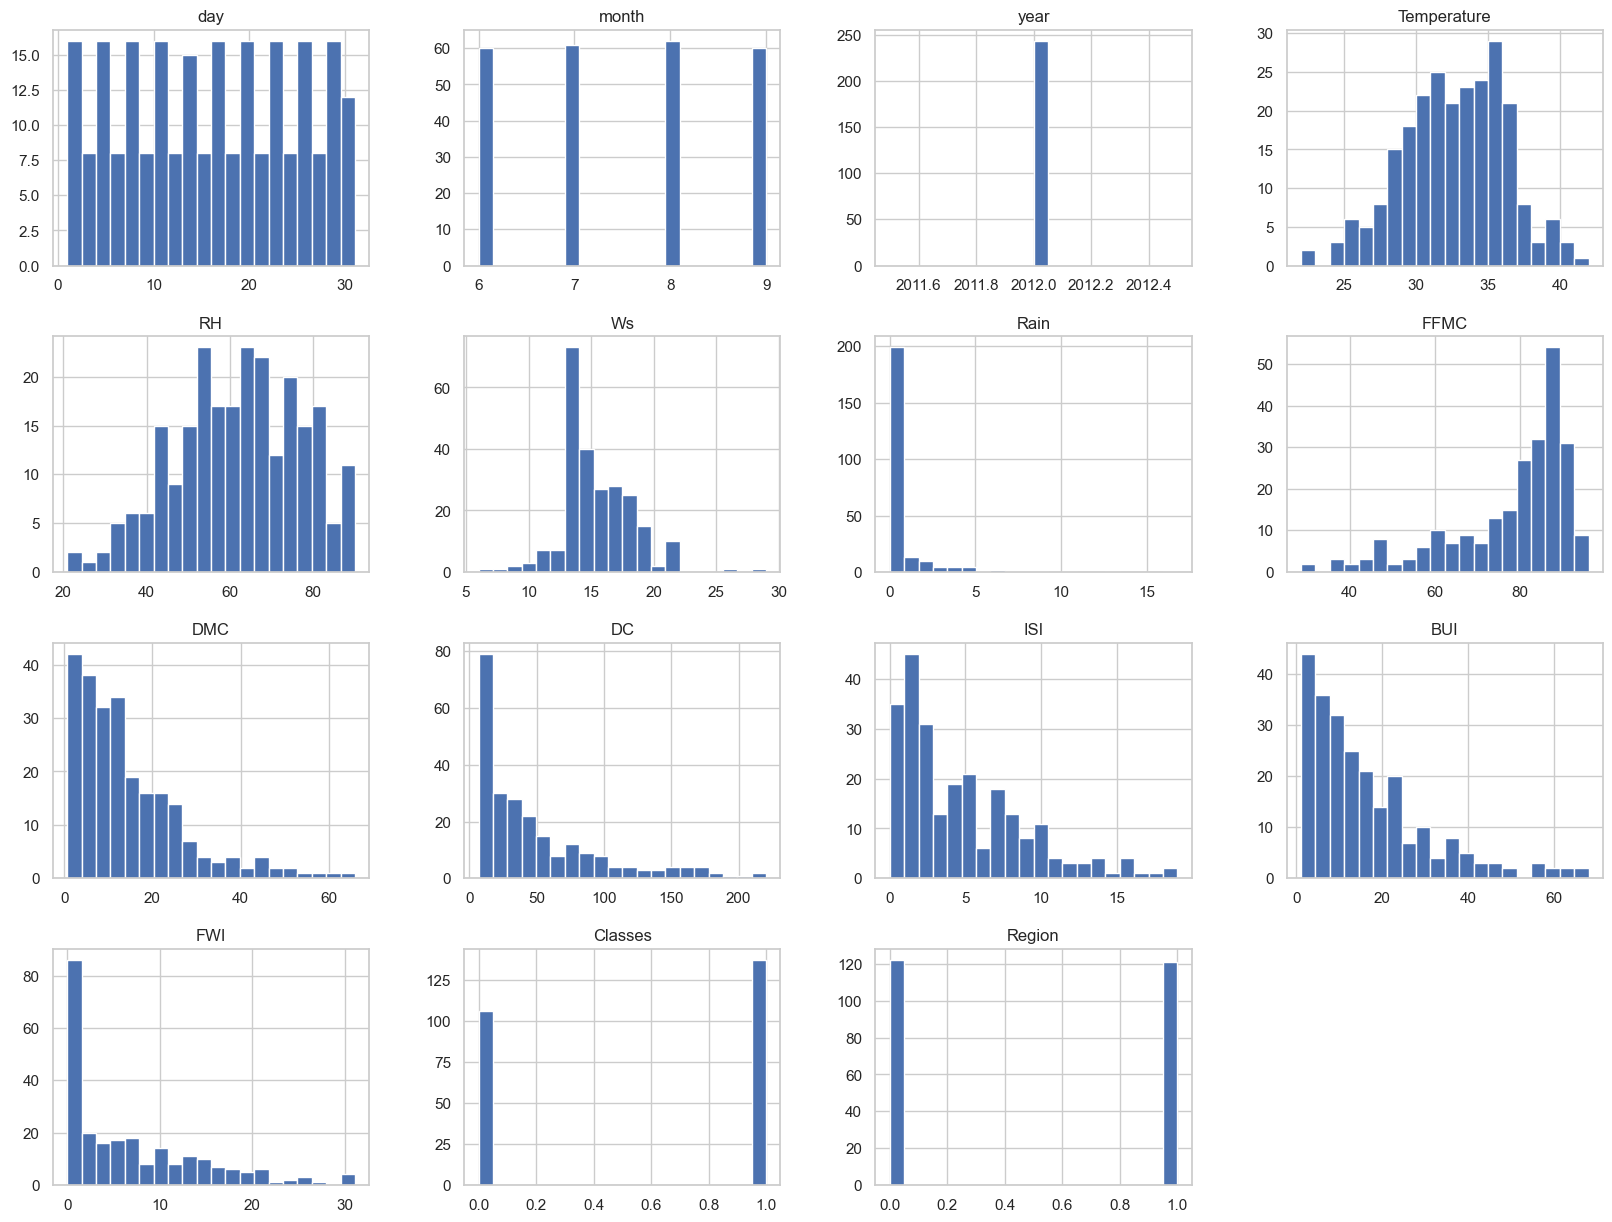

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")   # modern Seaborn theme
df.hist(bins=20, figsize=(20,15))
plt.show()

# Now checking the correlation for colinearity checking

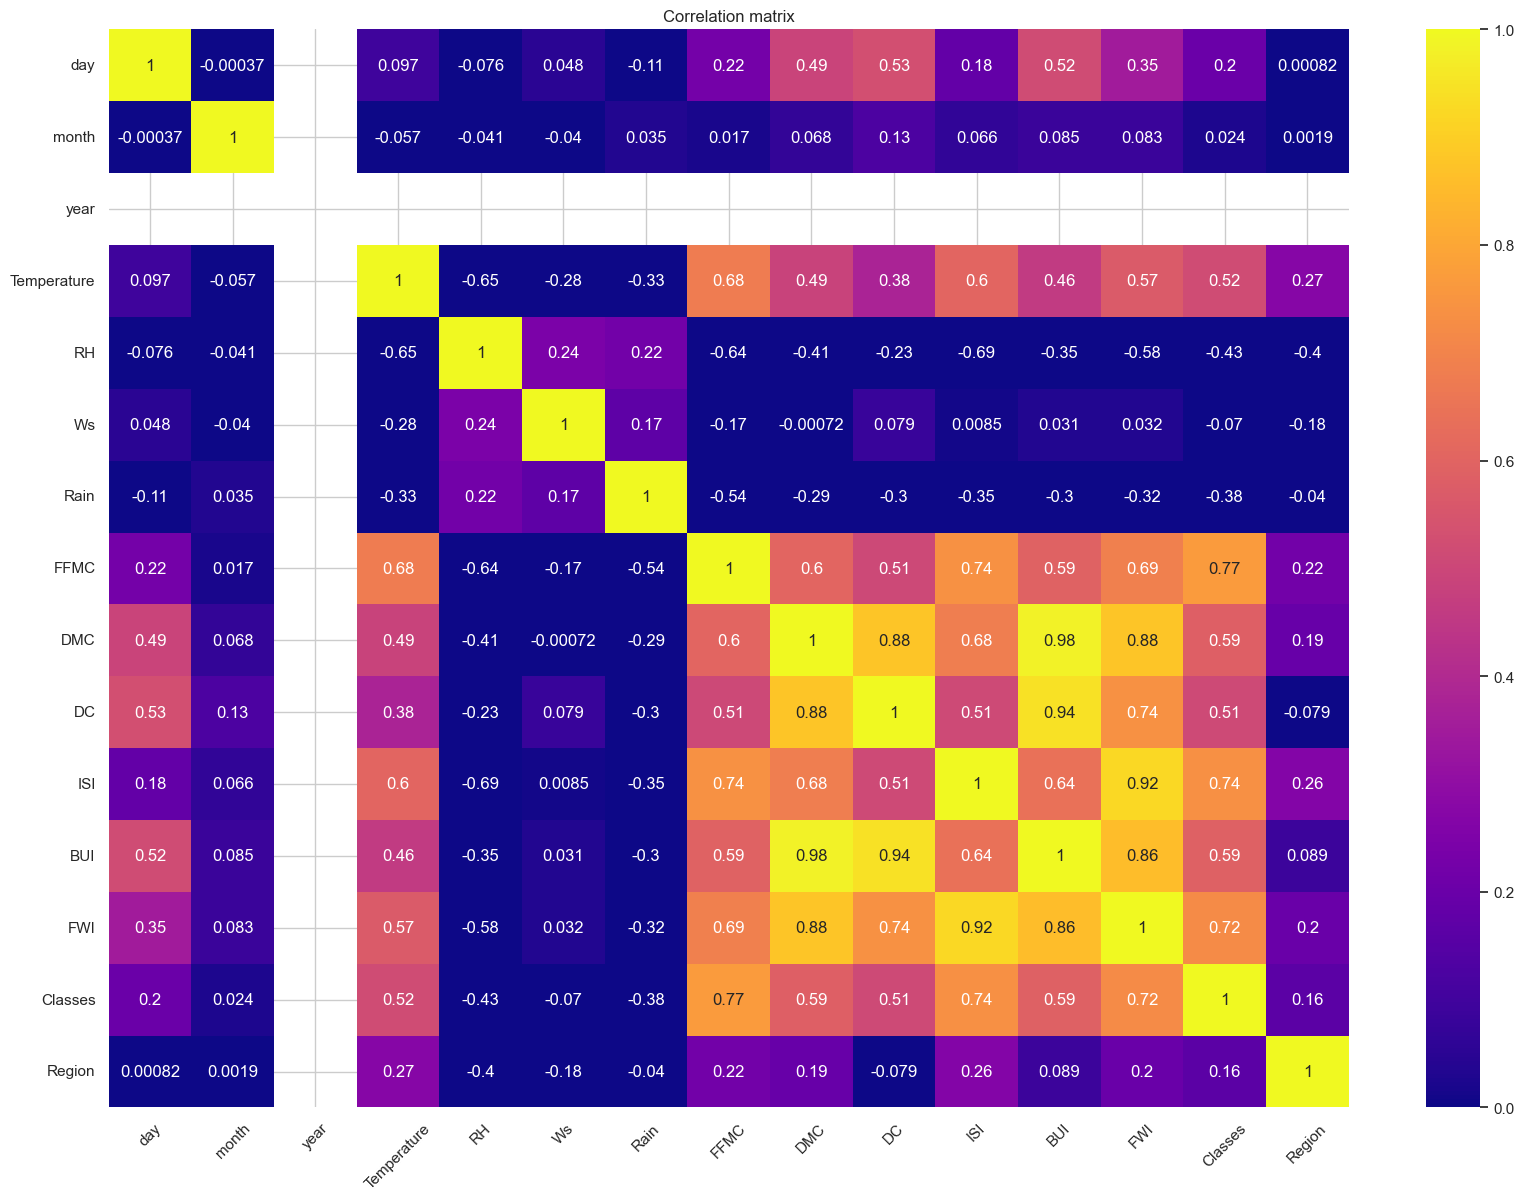

In [16]:
plt.figure(figsize=(20,14))
plt.title("Correlation matrix")
sns.heatmap(
    df.corr(),
    cmap ='plasma',
    annot = True,
    vmin = 0,
    vmax = 1
)
plt.xticks(rotation=45)   # tilt x-axis labels
plt.yticks(rotation=0)
plt.show()

In [17]:
df.drop(['day','month','year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [18]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# Differentiating the dependent and independent features

In [19]:
X= df.drop('FWI',axis=1)
y= df['FWI']
print("Shape of X :", X.shape)
print()
print("Shape of y: ", y.shape)

Shape of X : (243, 11)

Shape of y:  (243,)


# NOw spliting the values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# Checking the correlation of the X_train

In [22]:
def correlational_matrix(dataframe):
    plt.figure(figsize=(20,14))
    sns.heatmap(
        dataframe.corr(),
        annot= True,
        cmap = 'viridis',
        vmin = 0,
        vmax = 1
    )
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 0)
    plt.show()

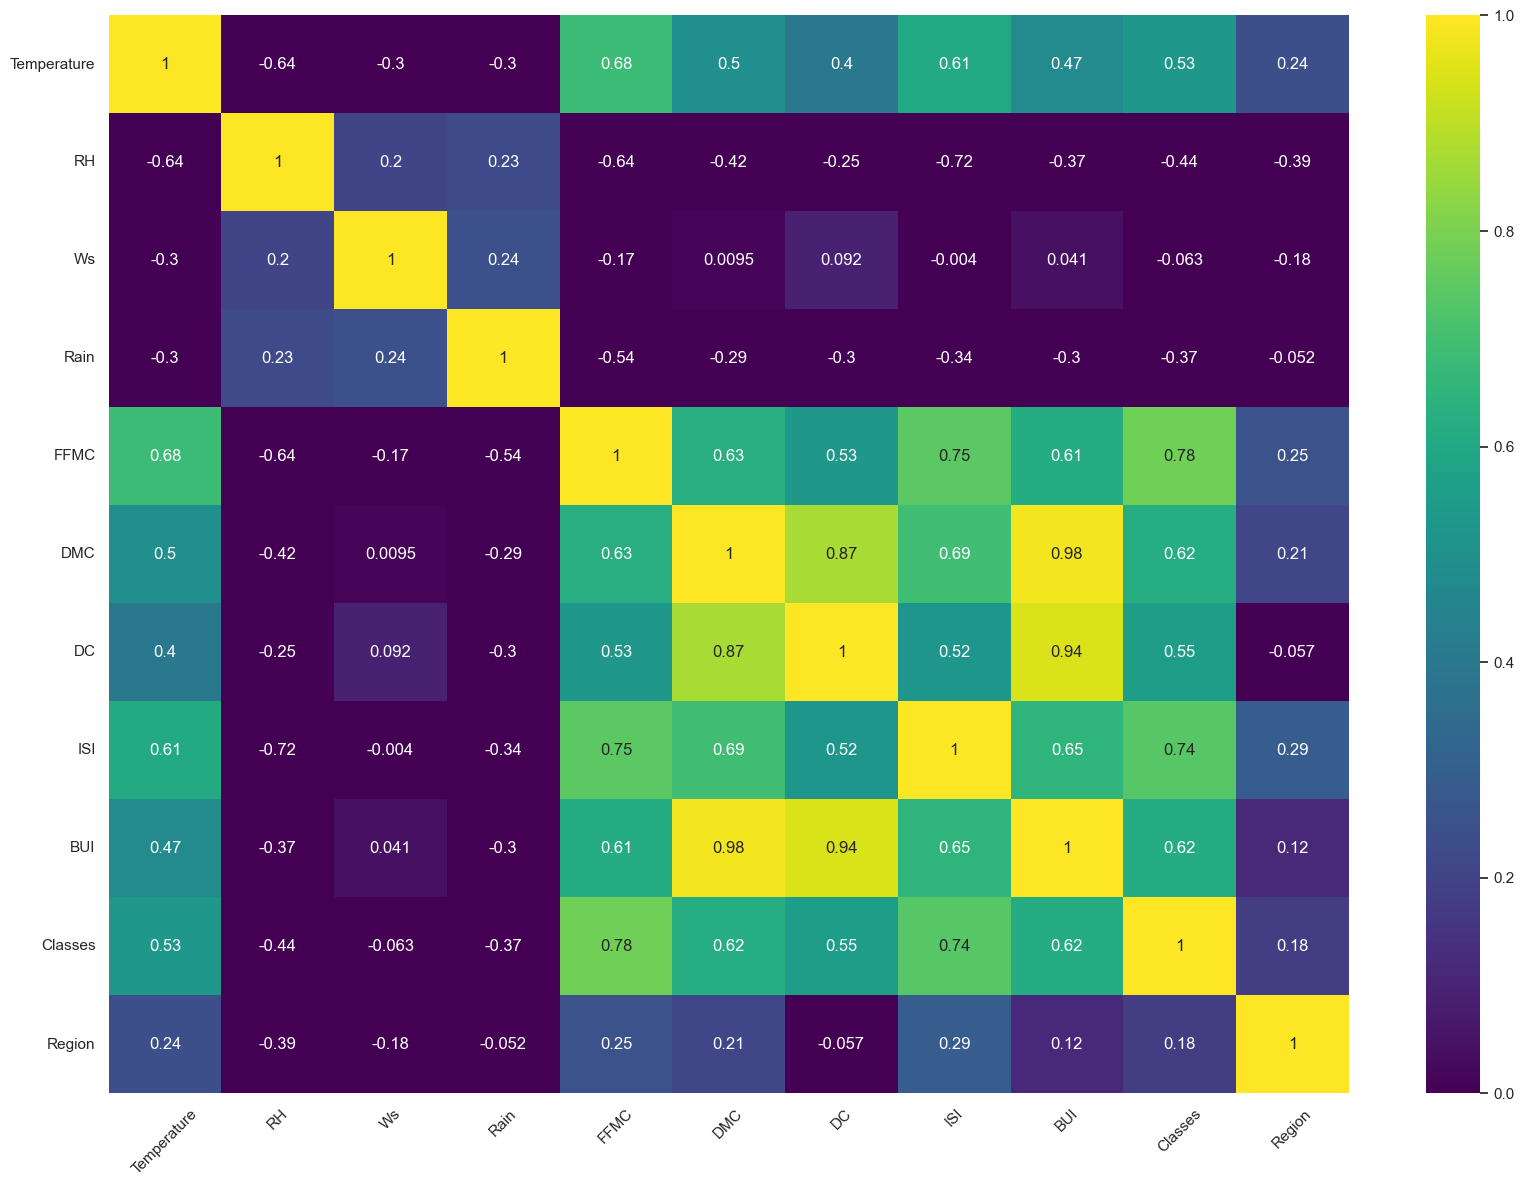

In [23]:
correlational_matrix(X_train)

# Now dropping the attributes which has the colinearity

In [24]:
def remove_colinearity(data, threshold):
    co_set = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                co_set.add(col_name)
    data.drop(list(co_set), axis = 1, inplace=True)

In [25]:
remove_colinearity(X_train, 0.85)
remove_colinearity(X_test, 0.85 )

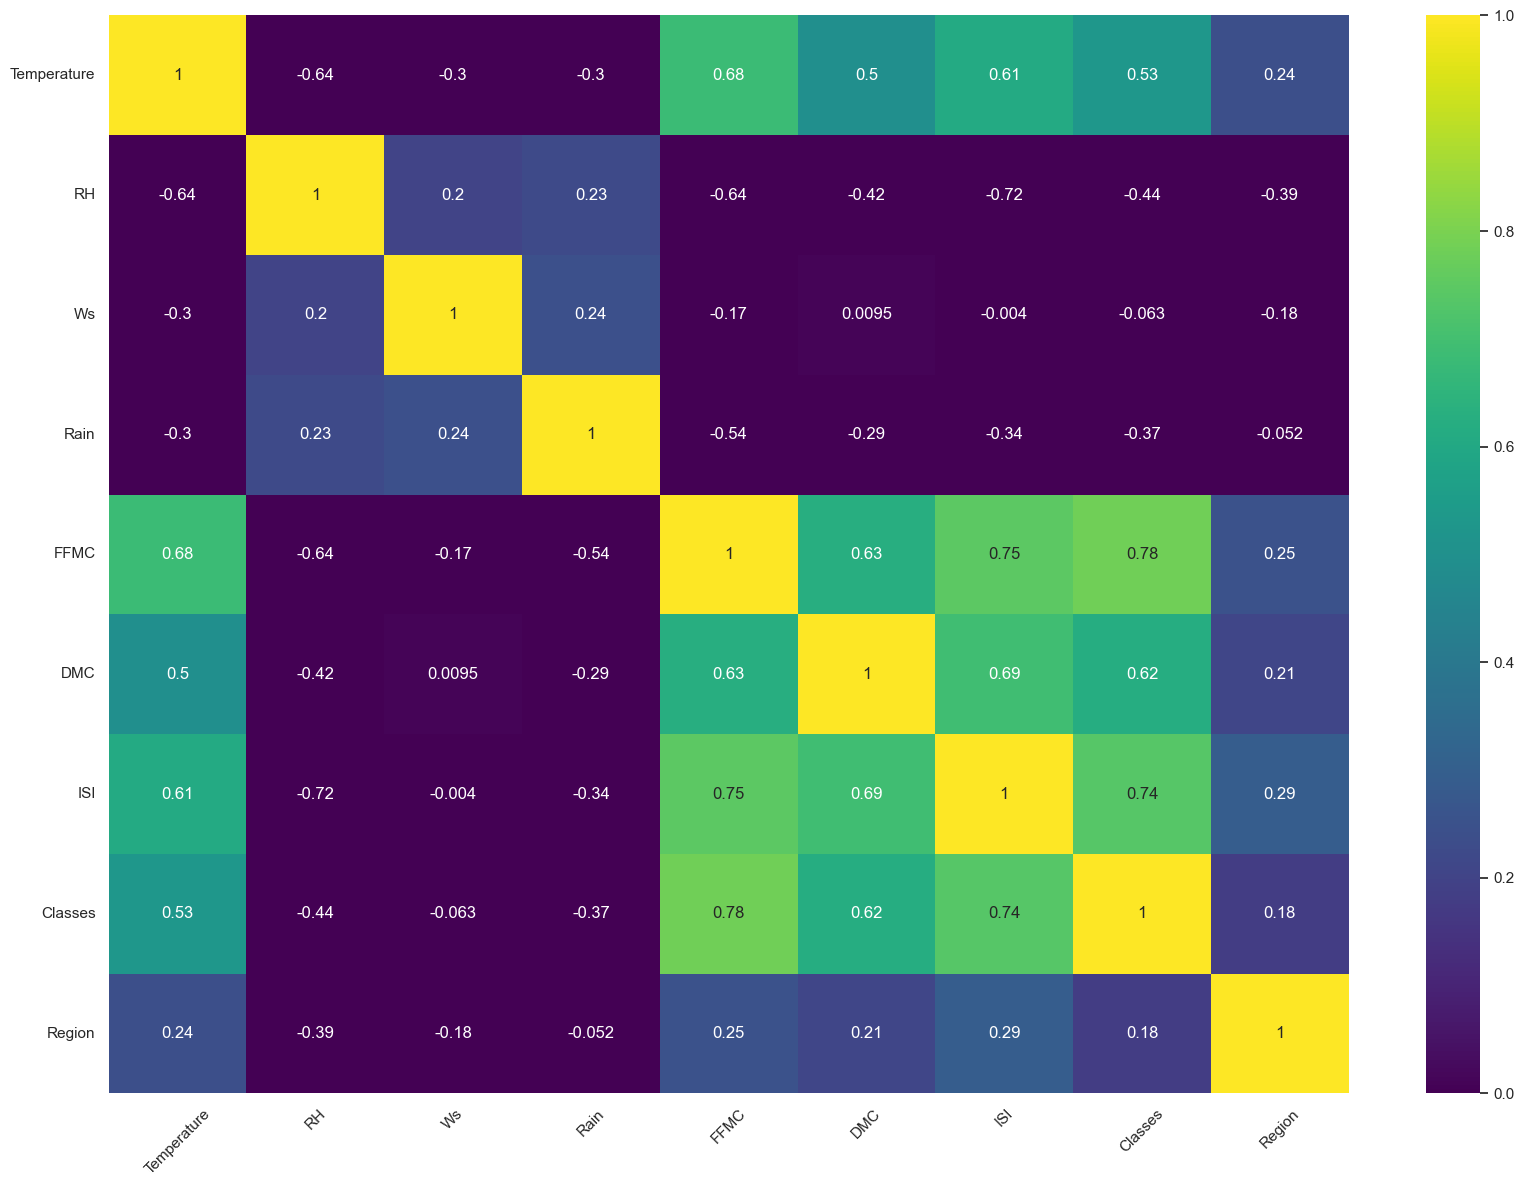

In [34]:
correlational_matrix(X_train)

# Now scaling the features

In [26]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

# Box Plot to observe the effect of standard scaling

Text(0.5, 1.0, 'After scaling the data')

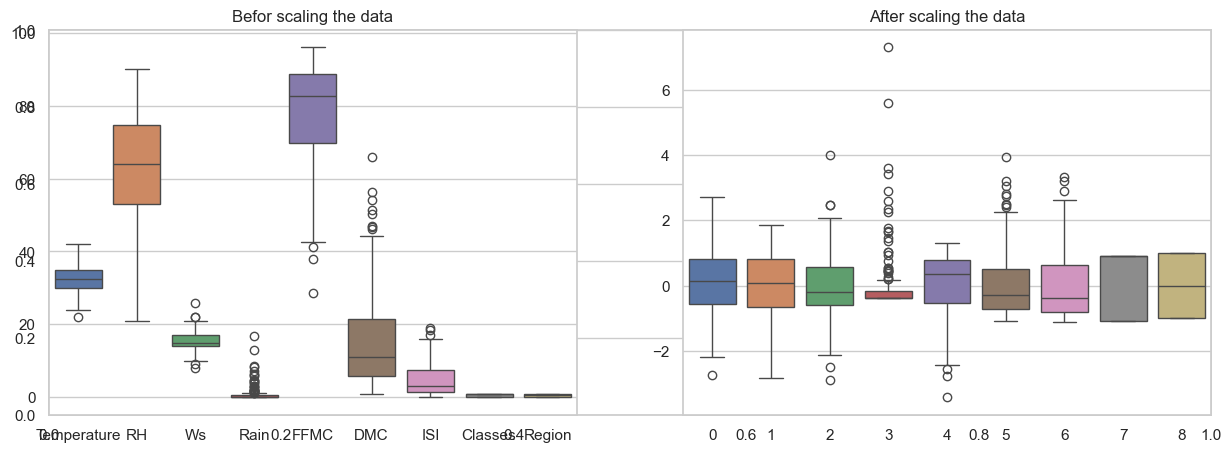

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Befor scaling the data")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("After scaling the data")

# Now lets apply the regression model

In [28]:
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    RidgeCV, LassoCV, ElasticNetCV
)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def model_to_apply(model_class, cv=None):
    # Initialize model
    if cv is None:
        model = model_class()
    else:
        model = model_class(cv=cv)
    
    # Fit and predict
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    score = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"The mean squared error of {model_class.__name__} is: {mse:.4f}")
    print(f"The mean absolute error of {model_class.__name__} is: {mae:.4f}")
    print(f"The root mean squared error of {model_class.__name__} is: {rmse:.4f}")
    print(f"The r^2 score of {model_class.__name__} is: {score:.4f}")
    
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, color='purple', s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Predicted vs Actual")
    plt.show()
        
    print("-"*50)

# Now here comes the training and prediction and observation of each model

The mean squared error of LinearRegression is: 0.6829
The mean absolute error of LinearRegression is: 0.5648
The root mean squared error of LinearRegression is: 0.8264
The r^2 score of LinearRegression is: 0.9847


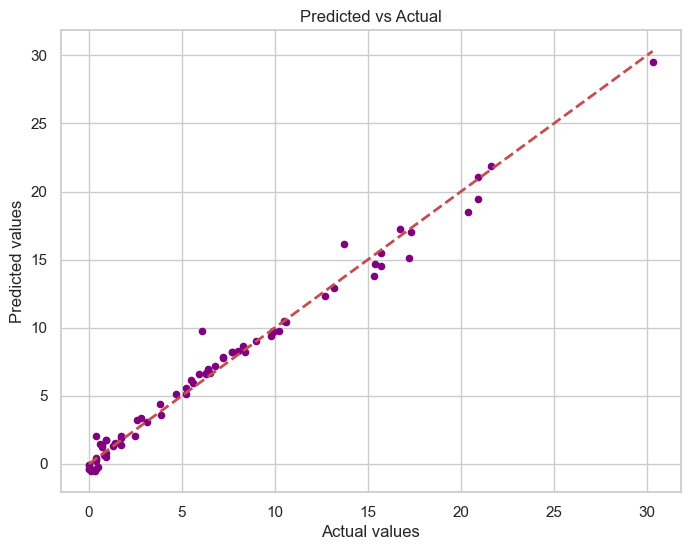

--------------------------------------------------
The mean squared error of Ridge is: 0.7079
The mean absolute error of Ridge is: 0.5845
The root mean squared error of Ridge is: 0.8414
The r^2 score of Ridge is: 0.9842


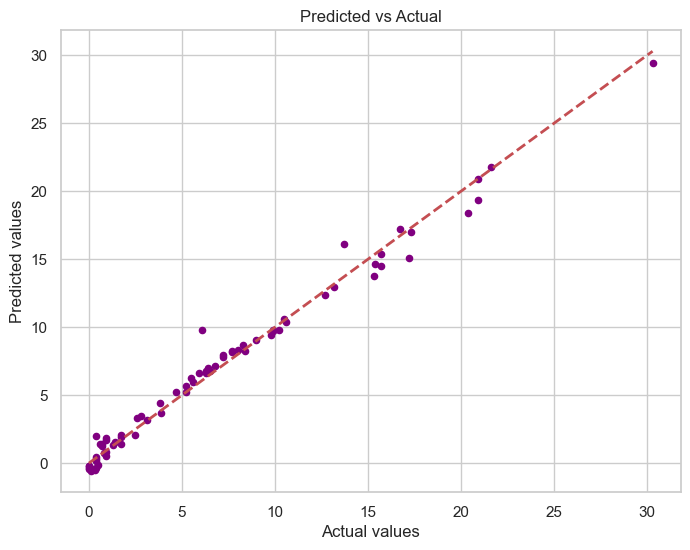

--------------------------------------------------
The mean squared error of Lasso is: 2.1840
The mean absolute error of Lasso is: 1.1203
The root mean squared error of Lasso is: 1.4778
The r^2 score of Lasso is: 0.9511


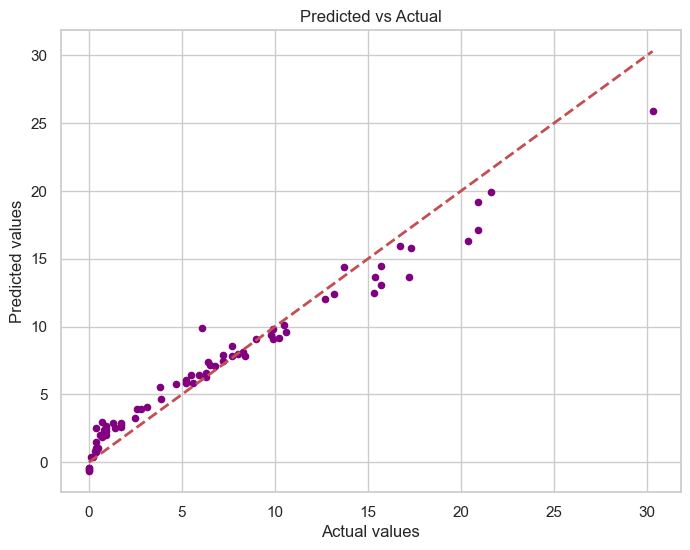

--------------------------------------------------
The mean squared error of ElasticNet is: 5.3453
The mean absolute error of ElasticNet is: 1.8555
The root mean squared error of ElasticNet is: 2.3120
The r^2 score of ElasticNet is: 0.8804


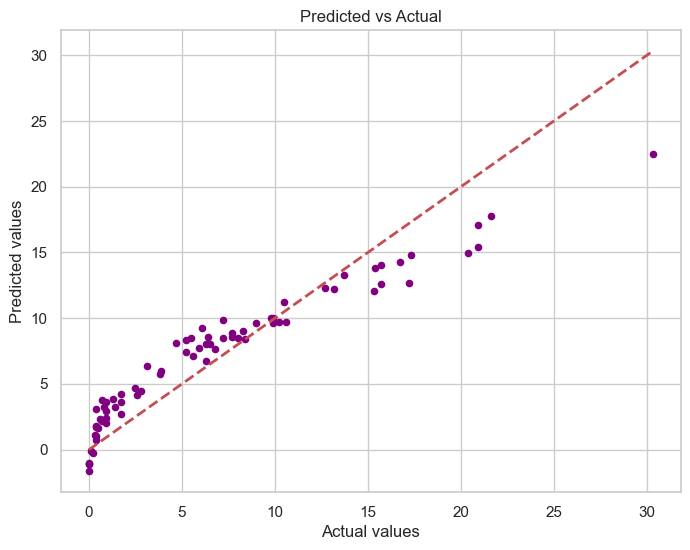

--------------------------------------------------


In [29]:
list = [LinearRegression, Ridge, Lasso, ElasticNet]
for i in list:
    model_to_apply(i)

The mean squared error of RidgeCV is: 0.7079
The mean absolute error of RidgeCV is: 0.5845
The root mean squared error of RidgeCV is: 0.8414
The r^2 score of RidgeCV is: 0.9842


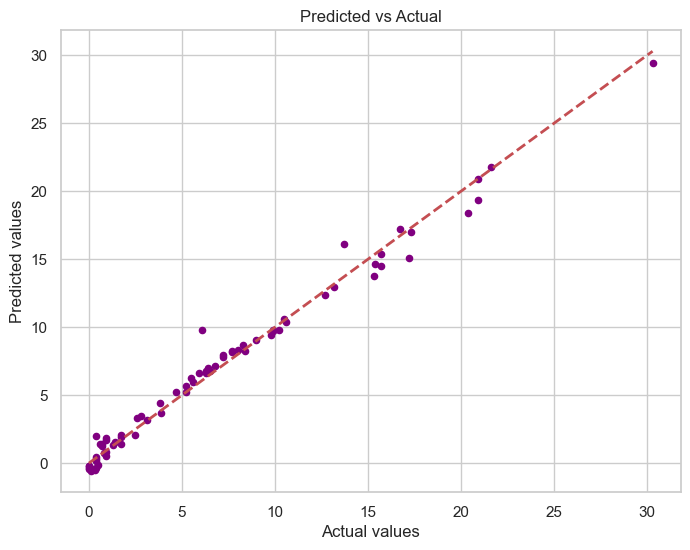

--------------------------------------------------
The mean squared error of LassoCV is: 1.2830
The mean absolute error of LassoCV is: 0.8259
The root mean squared error of LassoCV is: 1.1327
The r^2 score of LassoCV is: 0.9713


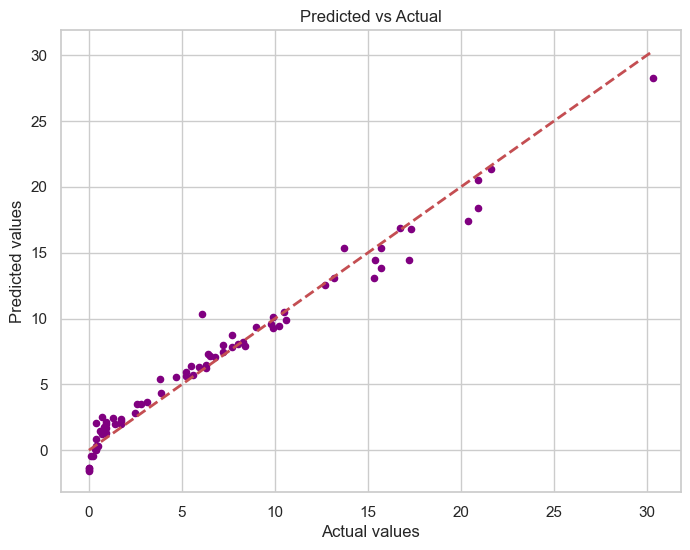

--------------------------------------------------
The mean squared error of ElasticNetCV is: 0.8058
The mean absolute error of ElasticNetCV is: 0.6517
The root mean squared error of ElasticNetCV is: 0.8977
The r^2 score of ElasticNetCV is: 0.9820


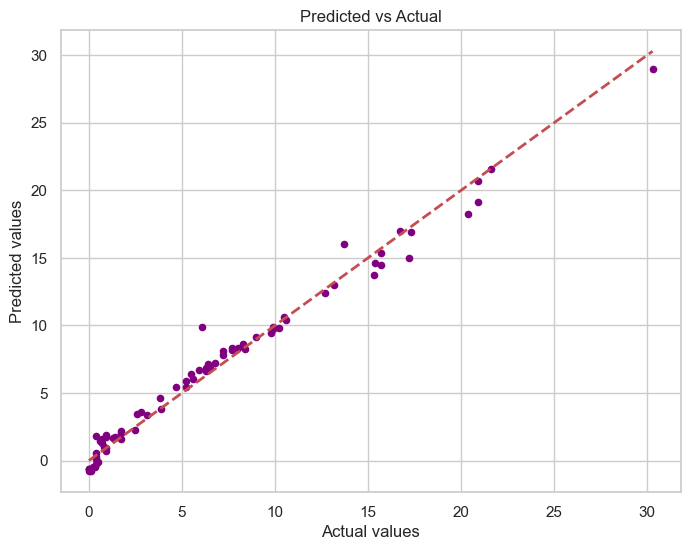

--------------------------------------------------


In [30]:
models = [
    (RidgeCV, 2),
    (LassoCV, 2),
    (ElasticNetCV, 2)
]

for model_class, cv in models:
    model_to_apply(model_class, cv)

# Pickiling the machine learning model and preprocessing

In [31]:
lin = LinearRegression()
lin.fit(X_train_scaled,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
import pickle
pickle.dump(std, open('scaler.pkl','wb'))
pickle.dump(lin, open('Linear.pkl','wb'))